<a href="https://colab.research.google.com/github/plee0617/IS-170-Binder/blob/Support-Vector-Machines/LEE_IS170_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pang Yia Lee
# 4/30/2023

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train.shape

(2000, 21)

In [ ]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
for col in train.columns:
    print(col, train[col].unique())

battery_power [ 842 1021  563 ... 1139 1467  858]
blue [0 1]
clock_speed [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim [0 1]
fc [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g [0 1]
int_memory [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 19

In [ ]:
train.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
train.shape

(2000, 21)

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# select top K features using chi-square test
selector = SelectKBest(chi2, k=9)
X_new = selector.fit_transform(train.drop(['price_range'], axis=1), train['price_range'])

In [ ]:
# show the selected features
features = train.drop(['price_range'], axis=1).columns[selector.get_support()]
features.values

array(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_w', 'talk_time'], dtype=object)

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, train['price_range'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Qua', QuadraticDiscriminantAnalysis()))
models.append(('XGB', XGBClassifier()))

In [ ]:
# evaluate each model in turn
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print("%s: %.3f%%" % (name, acc * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 62.000%
LDA: 94.500%
KNN: 94.250%
CART: 84.750%
NB: 79.500%
SVM: 96.500%
RF: 92.000%
ET: 92.500%
AB: 67.250%
GBM: 89.750%
Qua: 96.250%
XGB: 90.250%


In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(f"SVM linear kernel {accuracy_score(y_test, pred)*100}%")

SVM linear kernel 98.5%


Evaluation

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
print(f"Precision score = {metrics.precision_score(y_test,pred, average='weighted')}")

Precision score = 0.9852280539341828


In [ ]:
print(f"Recall score = {metrics.recall_score(y_test,pred, average='weighted')}")

Recall score = 0.985


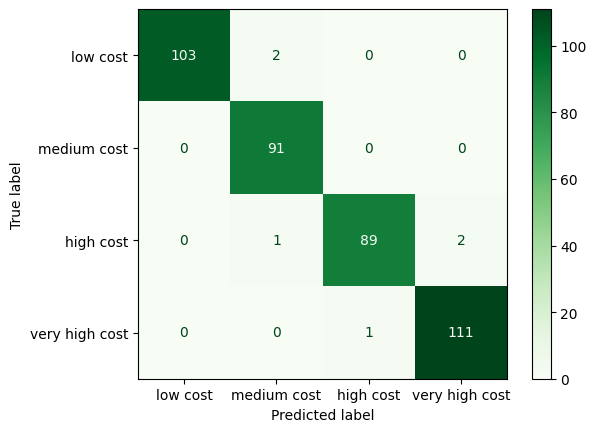

In [ ]:
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
labels_names = [0,1,2,3]
cm = metrics.confusion_matrix(y_test, pred,labels=labels_names)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Greens,values_format='g')
plt.show()

In [ ]:
best_model = SVC(kernel="linear")
best_model.fit(X_new, train['price_range'])

SVC(kernel='linear')

In [ ]:
test_new = selector.transform(test.drop(['id'], axis=1))

In [ ]:
test_pred = best_model.predict(test_new)

In [ ]:
test_pred = pd.DataFrame(test_pred, columns=['price_range'])

In [ ]:
test_pred['id'] = test['id']

In [ ]:
test_pred = test_pred[['id', 'price_range']]

In [ ]:
test_pred.to_csv('test.csv', index=False)

Chosen features and the algorithm with a linear kernal are suitable for the task, with an accuracy score of 98.5%